In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [3]:
data  = pd.read_csv('pd_speech_features.csv', skiprows=1)
data = data.drop(['id'], axis=1)
data = data
X = data.drop(['class'], axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "SVM": SVC(random_state=42),
        "XGBoost": XGBClassifier(random_state=42)
}

#Train and evaluation
results = {}
for name,model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
            'cv mean' : cv_scores.mean(),
            'cv std' : cv_scores.std(),
            "train_score": np.mean(cv_scores),
            "test_score": accuracy_score(y_test, y_pred)
    }
    print(f"{name} has been trained and evaluated")
    print(f"CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))








Random Forest has been trained and evaluated
CV Accuracy: 0.859 (+/- 0.048)
Test Accuracy: 0.862

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.55      0.67        38
           1       0.87      0.96      0.91       114

    accuracy                           0.86       152
   macro avg       0.85      0.76      0.79       152
weighted avg       0.86      0.86      0.85       152

SVM has been trained and evaluated
CV Accuracy: 0.846 (+/- 0.064)
Test Accuracy: 0.855

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.45      0.61        38
           1       0.84      0.99      0.91       114

    accuracy                           0.86       152
   macro avg       0.89      0.72      0.76       152
weighted avg       0.87      0.86      0.84       152

XGBoost has been trained and evaluated
CV Accuracy: 0.874 (+/- 0.025)
Test Accuracy: 0.888

Classification Report:

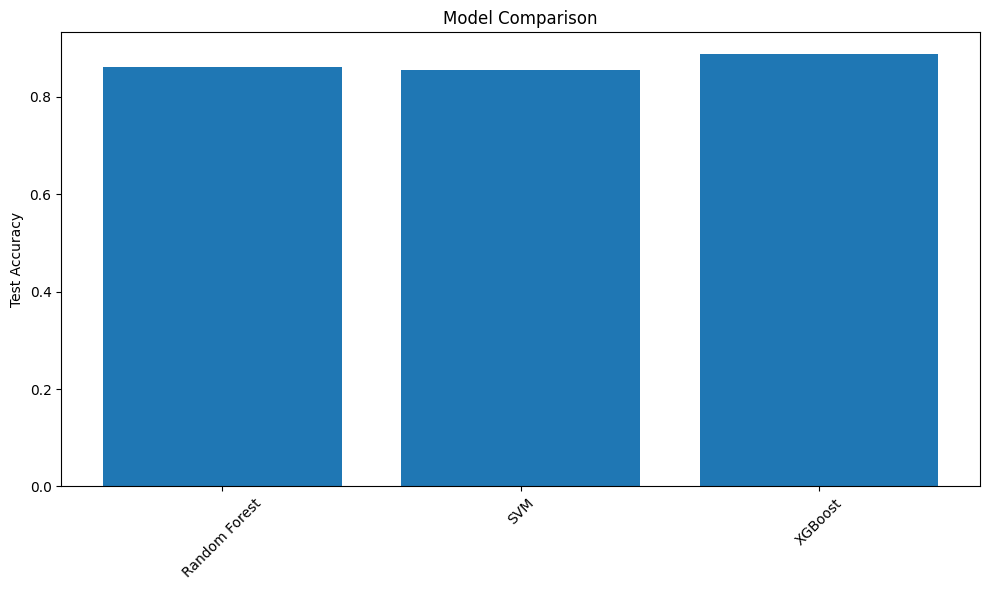

In [4]:
plt.figure(figsize=(10, 6))
plt.bar([name for name in results.keys()], 
        [result['test_score'] for result in results.values()])
plt.title('Model Comparison')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


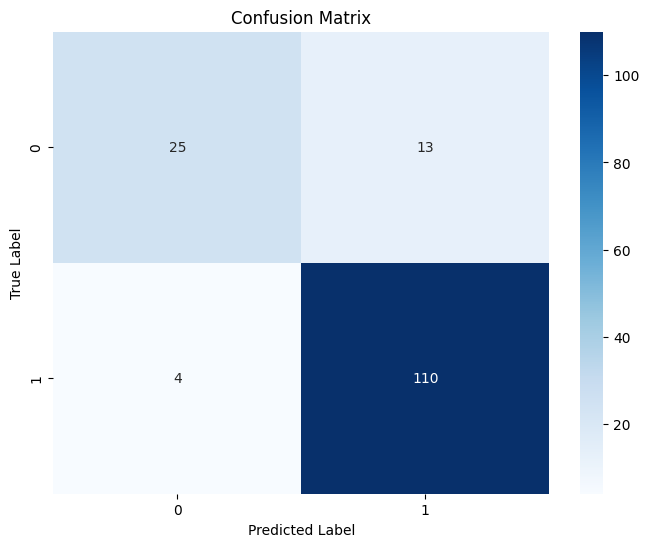

In [5]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [6]:
# Feature importance
rf_model = models["Random Forest"]
feature_imp = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
print("\nTop 10 Important Features:")
print(feature_imp.sort_values('Importance', ascending=False).head(10))


Top 10 Important Features:
                        Feature  Importance
125  std_delta_delta_log_energy    0.016475
111        std_delta_log_energy    0.011484
331          tqwt_energy_dec_11    0.009164
133         std_7th_delta_delta    0.009075
476        tqwt_TKEO_std_dec_12    0.008897
440       tqwt_TKEO_mean_dec_12    0.007770
58           mean_MFCC_2nd_coef    0.007161
135         std_9th_delta_delta    0.006847
122              std_10th_delta    0.006471
137        std_11th_delta_delta    0.006190


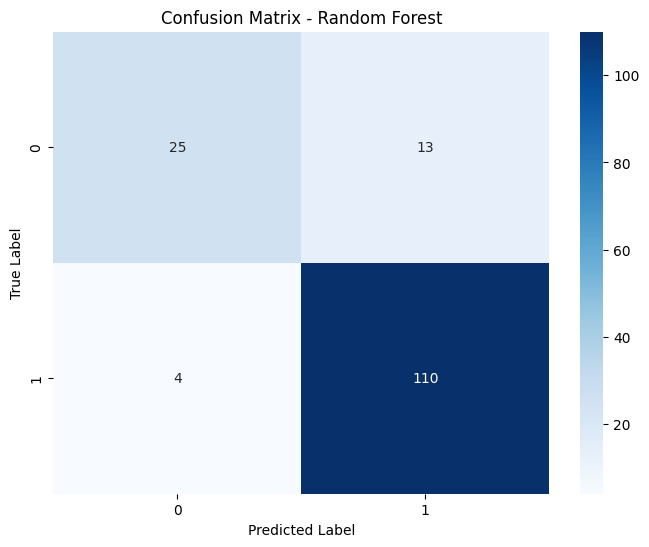

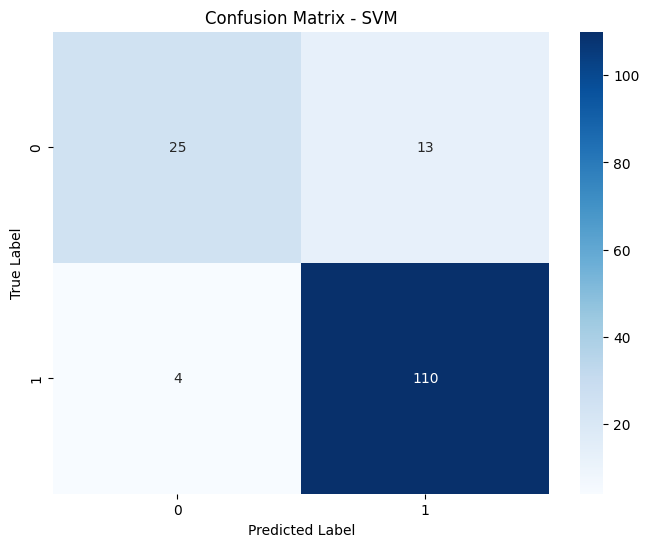

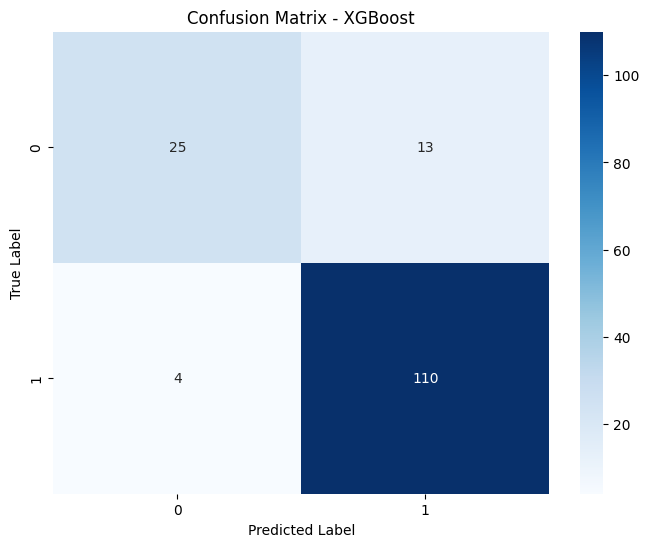

Generated Sample Data (Random Selection):
[ 9.61023870e-01 -1.14831081e+00 -9.38027381e-01  1.09880044e+00
 -2.49240104e+00 -2.48503277e+00 -3.61088863e-01 -3.46017700e-01
 -1.45078440e-01 -2.60744619e-01 -2.15232612e-01 -1.39479540e-01
 -2.19173267e-01  1.11417337e+00  1.15239231e+00  1.27229188e+00
  8.85071853e-01  1.31039414e+00  1.27245427e+00 -1.19168973e+00
  9.06494090e-01 -1.50882087e+00 -1.61949802e+00 -6.40245787e-01
 -6.88792129e-01  2.32229888e-01  5.89946939e-02 -1.52922103e-01
 -8.35449146e-01 -3.79975557e-01 -2.39361087e-01 -3.83807048e-01
 -6.32506765e-01  2.89863872e-02  1.12958057e-01  6.84996537e-02
 -3.46042243e-01 -6.21248544e-01 -1.81472240e-01  4.55313850e-01
 -2.01093281e-01  8.91483367e-01 -4.34723451e-01 -3.83975246e-01
 -5.86642829e-01 -8.02301152e-01 -6.15848055e-01 -2.37773425e+00
 -6.60918890e-01 -4.83595016e-01 -8.57075938e-01 -9.99004399e-01
 -9.46584826e-01  8.06185282e-01 -4.66287293e-01 -9.23792686e-01
  4.21935356e-01  2.28886013e-01 -1.71373266e+00

c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


for name, model in models.items():
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Test function for new values
def predict_parkinsons(model, features):
    features_scaled = scaler.transform([features])
    prediction = model.predict(features_scaled)
    probability = model.predict_proba(features_scaled)
    return prediction[0], probability[0]


sample_index = np.random.randint(0, X_train.shape[0])  # Random index within training data range
sample_features = X_train[sample_index]  # Select the row corresponding to the random index

print("Generated Sample Data (Random Selection):")
print(sample_features)

# Using the best model to predict the sample data
best_model = models['Random Forest']  

prediction, probability = predict_parkinsons(best_model, sample_features)
print(f"\nPrediction for new sample: {'Parkinson\'s' if prediction == 1 else 'Healthy'}")
print(f"Probability: {probability[1]:.2f}")

# Print final model accuracies
print("\nFinal Model Accuracies:")
for name, result in results.items():
    print(f"{name}: Test Accuracy = {result['test_score']:.3f}")
